# Titanic Survival Prediction

<img src="flow_chart.png" height=200px width=800px></img>

## Frame the problem

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

<img src="code.jpg" height=100px width=200px></img>

<img src="letsstarted.jpg" height=200px width=200px></img>

### Importing the basic required libraries

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

## Step 1 :

<img src="step1.jpg" height=200px width=200px></img>

### Reading the data from CSV file

In [242]:
data = pd.read_csv('titanic.csv')

## Analyze Data

### Obtaining a glimpse of data

In [243]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [244]:
data.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [245]:
type(data)

pandas.core.frame.DataFrame

In [246]:
data.shape

(891, 12)

In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [248]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualization of the Data

#### Getting data insights

In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


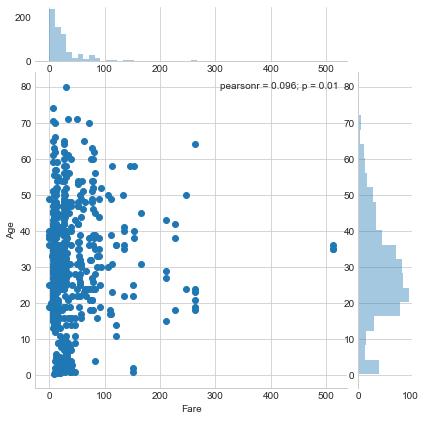

In [250]:
sns.jointplot(x='Fare',y='Age',data=data)

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


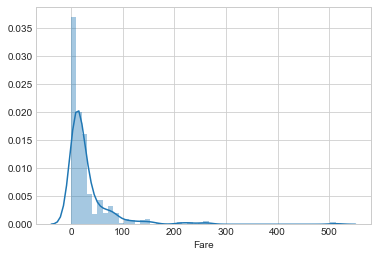

In [251]:
sns.distplot(data['Fare'])

In [252]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Text(0.5, 1, 'data.corr()')

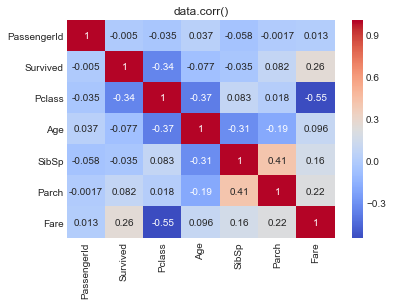

In [253]:
sns.heatmap(data.corr(),cmap='coolwarm',xticklabels=True,annot=True)
plt.title('data.corr()')

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:1313: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:1317: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


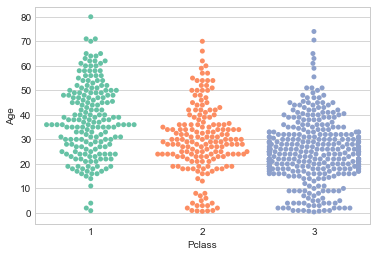

In [254]:
sns.swarmplot
sns.swarmplot(x='Pclass',y='Age',data=data,palette='Set2')

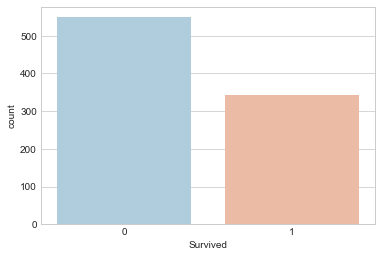

In [255]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data,palette='RdBu_r')

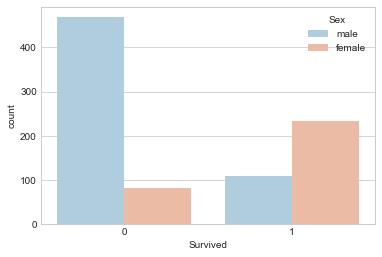

In [256]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data,palette='RdBu_r')

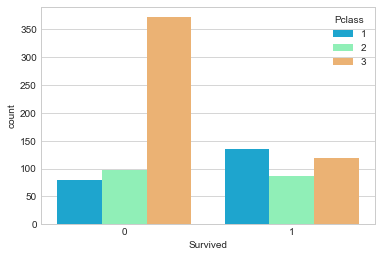

In [257]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data = data,palette='rainbow')

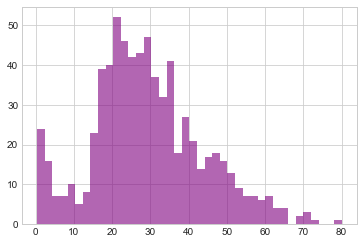

In [258]:
data['Age'].hist(bins = 40, color = 'purple', alpha = 0.6)

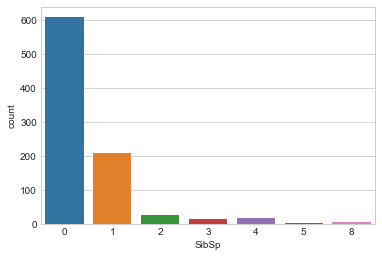

In [259]:
sns.countplot(x = 'SibSp', data = data)

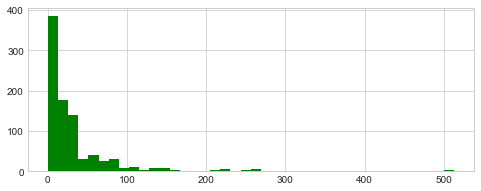

In [260]:
data['Fare'].hist(color = 'green', bins = 40, figsize = (8,3))

## Step 2

<img src="step2a.jpg" height=200px width=200px></img>

##### What you will get once you gathered all the data?
### Ans:- Dirty Data

<img src="clean.png" height=200px width=200px></img>

## Cleaning Data

#### Fill the missing values in the obtained data

##### NaN values ? Wait! what is NaN first? 
NaN- Not a Number

#### How to handle missing values ?

***1 . Drop the entire row!***
<br>
***2 . Drop the entire Column !***
<br>
 Note : To erase the rows or Columns that have NaN values. But this is not a good choice because in such a way we lose the information, especially when we work with small datasets.
<br>
***3 . Replace the missing value with special metrics, for example, mean or median of the coulmn.***
<br>
***4 . Replace with the mean or median with the respective class or type of other column ***
<br>
***5 . Build a model that predicts the missing values***

<img src="missingmodel1.png" height=1000px width=1000px></img>

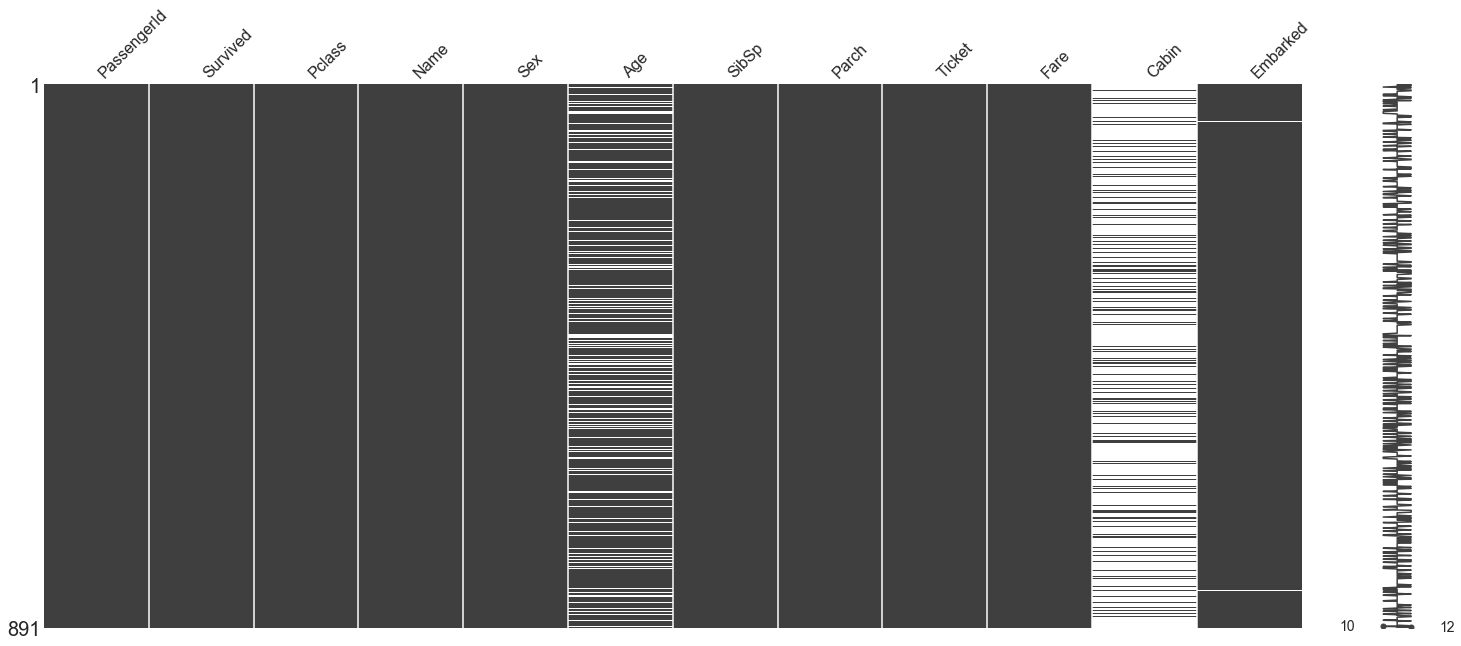

In [261]:
ms.matrix(data)

Text(0.5, 1, 'data.corr()')

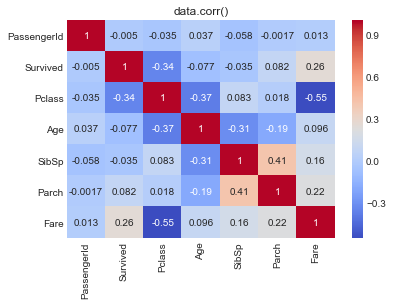

In [262]:
sns.heatmap(data.corr(),cmap='coolwarm',xticklabels=True,annot=True)
plt.title('data.corr()')

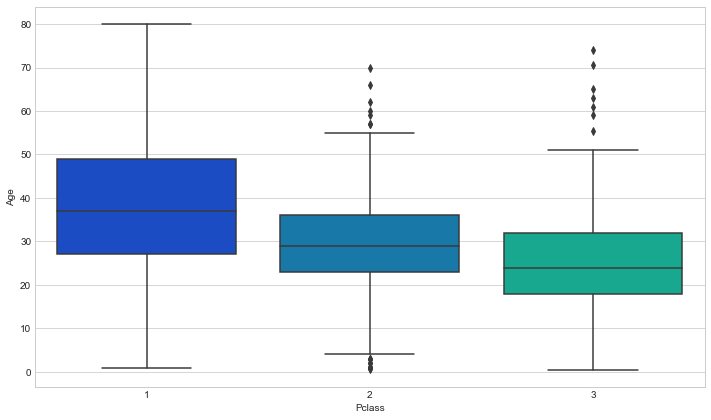

In [263]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

In [264]:
data.groupby('Pclass')['Age'].median()


Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64


The average age for each of the classes are estimated to be as follows:
  
  * For **Class 1** - The median age is 37
  * For **Class 2** - The median age is 29
  * For **Class 3** - The median age is 24
  
Let's impute these values into the age column.



In [265]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        # Class-1
        if Pclass == 1:
            return 37
        # Class-2 
        elif Pclass == 2:
            return 29
        # Class-3
        else:
            return 24

    else:
        return Age



Applying the function.

In [266]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

Now let's visualize the missing values.

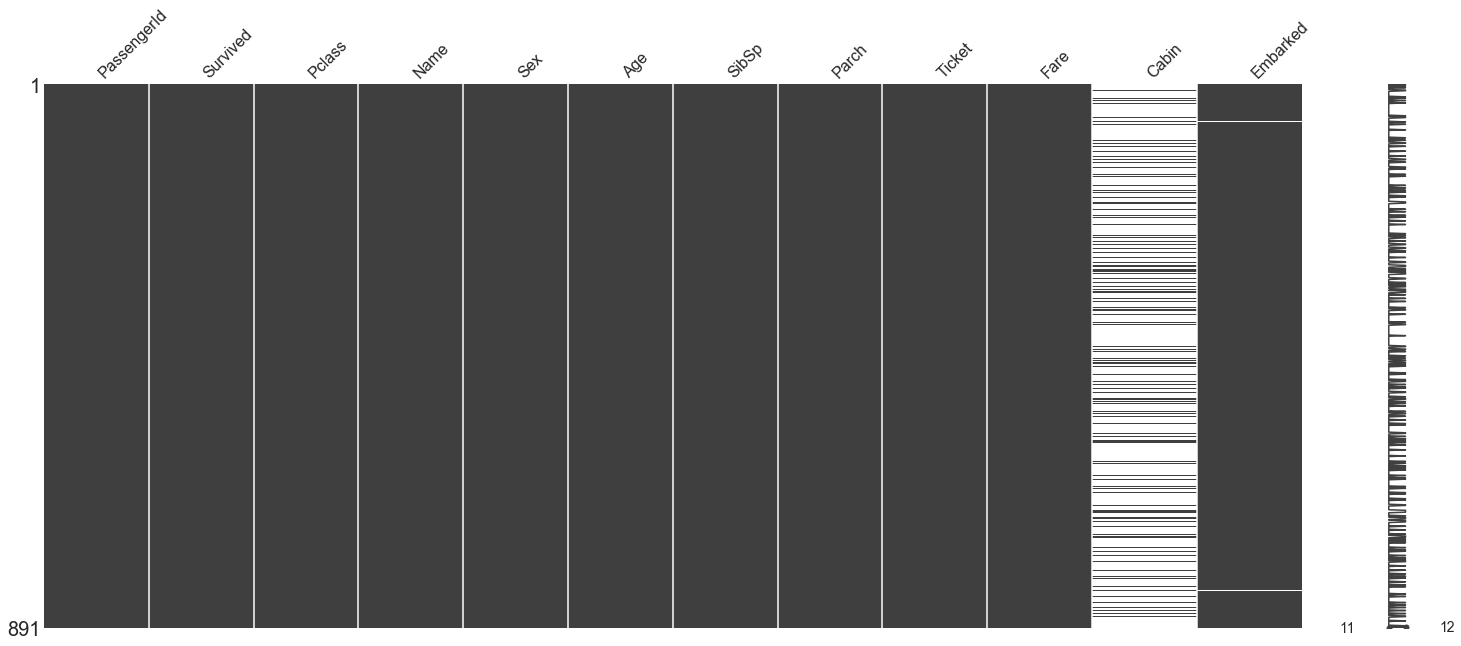

In [267]:
ms.matrix(data)

The Age column is imputed sucessfully.

Let's drop the Cabin column and the row in the Embarked that is NaN.

In [268]:
data.drop('Cabin', axis = 1,inplace=True)

In [269]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [270]:
data.dropna(inplace = True)

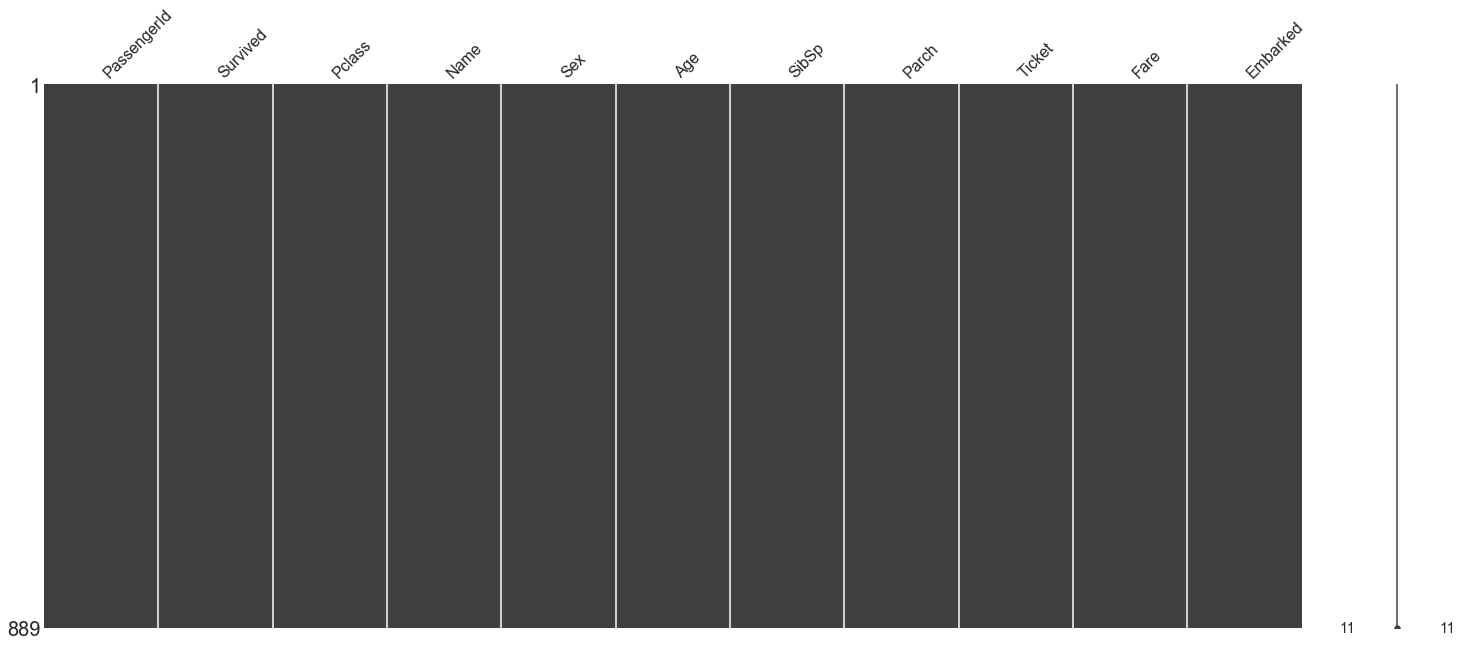

In [271]:
ms.matrix(data)

In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


### Categorical value conversion

In [273]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [274]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [275]:
data['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [276]:
sex_df = pd.get_dummies(data['Sex'],drop_first=3)
sex_df.head()

,male
0,1
1,0
2,0
3,0
4,1


In [277]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [278]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [279]:
644+168+77

889

In [280]:
embark_df = pd.get_dummies(data['Embarked'],drop_first=True)
embark_df.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [281]:
old_data = data.copy()
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [282]:
old_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [283]:
data = pd.concat([data,sex_df,embark_df],axis=1)

In [284]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [285]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
male           889 non-null uint8
Q              889 non-null uint8
S              889 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.2 KB


In [286]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681,0.649044,0.086614,0.724409
std,256.998173,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504,0.477538,0.281427,0.447063
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


## Step 3

<img src="model.jpg" height=300px width=300px></img>

##### choosing a right model!, refer the following 
https://hackernoon.com/choosing-the-right-machine-learning-algorithm-68126944ce1f
<br>
https://elitedatascience.com/algorithm-selection

<table><tr><td><img src='images.jpg' style="height:300px;width:300px"></td><td><img src='images2.png' style="height:300px;width:300px"></td></tr></table>

### Here comes Overfittiing and Underfitting

<img src="dd.png" height=400px width=400px></img>

<img src="over.jpg" height=400px width=400px></img>

### No it's not :-(

<img src="overunder.png" height=400px width=400px></img>

### This happens 

<img src="captain.jpg" height=400px width=400px></img>

### This is me

<img src="overfitting.jpg" height=400px width=400px></img>

## Train-Test Split

<img src="tt.jpg" height=400px width=400px></img>

### Surely this will happen

<img src="past.jpg" height=400px width=400px></img>

### and then your model will say

<table><tr><td><img src='failed.jpg' style="height:300px;width:300px"></td><td><img src='sarcasm.jpg' style="height:300px;width:300px"></td></tr></table>

<img src="supervised_flow_chart.png" height = 200px width = 800px></img>

In [287]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1), 
                                                    data['Survived'], test_size=0.30, 
                                                    random_state=101)

## Step 4

<table><tr><td></td><td><img src='training2.jpg' style="height:300px;width:300px"></td></tr></table>

## Training the model

### Logistic Regression

In [288]:
from sklearn.linear_model import LogisticRegression

# Build the Model.
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Step 5

<img src="evaluation.jpg" height=300px width=300px></img>

### Predicting the model on the test set

In [289]:
predicted =  logmodel.predict(X_test)

In [290]:
predicted

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [291]:
from sklearn.metrics import confusion_matrix, classification_report

### Confusion Matrix
<img src="confusion.jpg" height=800px width=600px></img>  `

In [292]:
print(confusion_matrix(y_test, predicted))

[[151  12]
 [ 36  68]]


In [293]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predicted))

0.8202247191011236


To get all the above metrics at one go, use the following function:

In [294]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



## Step 6

<table><tr><td><img src='hyper.jpg' style="height:300px;width:300px"></td><td><img src='hyper2.jpg' style="height:300px;width:300px"></td></tr></table>

## Tune the Model

In [295]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Step 7

<table><tr><td><img src='prediction.png' style="height:300px;width:300px"></td><td><img src='serious.png' style="height:300px;width:300px"></td></tr></table>

In [296]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### PassengerId - Pclass - Age - SibSp - Parch - Fare - male - Q - S

In [297]:
s = [[1,1,342.0,1,0,71.42,0,0,1]]

In [298]:
logmodel.predict(s)[0]

0

<table><tr><td><img src='end.jpg' style="height:300px;width:300px"></td><td><img src='thankyou.jpg' style="height:300px;width:300px"></td></tr></table>